# Catcha Text Reading:

- <font size = '4'> There is a dataset of many captcha images where we need to **read** each captha image and **predict** the text in each one. 
    - The **actual text** is also given which is the **output** for the data set.
    - This training data set should be used to train the model.

- <font size = '4'> But before that we need to **extract the text** from each captcha image using **boundary boxes** segmentation

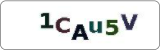

In [1]:
from PIL import Image

im = Image.open("captcha_0.png")
im

- <font size = '4'> This is the sample image of one captcha code in our data set.

In [2]:
import pytesseract

from pytesseract import Output
import cv2
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

img = cv2.imread("captcha_0.png")
txt = pytesseract.image_to_string(img)
print(txt)

IcausV



In [3]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [4]:
print(im.histogram())



[3, 1, 4, 7, 19, 8, 6, 9, 15, 13, 7, 9, 6, 6, 9, 7, 8, 5, 4, 6, 5, 5, 4, 4, 5, 5, 3, 1, 5, 8, 8, 7, 3, 3, 3, 8, 7, 9, 7, 8, 8, 10, 6, 11, 14, 13, 16, 14, 6, 11, 6, 7, 4, 7, 4, 3, 6, 13, 12, 6, 14, 10, 7, 12, 7, 4, 9, 5, 11, 6, 7, 6, 6, 2, 4, 2, 3, 7, 4, 4, 1, 5, 2, 4, 5, 3, 2, 3, 1, 4, 4, 1, 1, 2, 3, 2, 2, 1, 2, 0, 3, 2, 1, 3, 0, 3, 4, 2, 2, 3, 2, 3, 5, 2, 3, 2, 1, 1, 1, 1, 1, 4, 2, 4, 3, 1, 2, 2, 1, 2, 1, 1, 3, 3, 0, 1, 2, 3, 1, 4, 1, 7, 1, 1, 1, 0, 1, 1, 0, 4, 1, 4, 3, 243, 0, 1, 2, 0, 3, 0, 2, 1, 0, 5, 3, 1, 2, 1, 4, 2, 2, 0, 4, 5, 4, 4, 3, 3, 6, 149, 5, 3, 2, 0, 2, 3, 6, 4, 4, 1, 4, 2, 1, 0, 4, 1, 1, 7, 5, 5, 8, 5, 7, 5, 2, 1, 4, 1, 1, 3, 6, 4, 6, 5, 6, 5, 10, 4, 4, 7, 9, 5, 4, 5, 6, 5, 5, 8, 7, 155, 7, 8, 8, 10, 13, 14, 13, 16, 13, 21, 20, 23, 20, 39, 35, 41, 54, 66, 73, 86, 88, 122, 174, 110, 393, 4995, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 11, 9, 8, 5, 11, 5, 3, 6, 5, 4, 1, 2, 2, 2, 5, 0, 4, 4, 4, 6, 10, 9, 10, 7, 6, 6, 4, 5, 9, 5, 7, 10, 10, 14, 11, 7, 12, 5, 7, 12, 2, 10, 7, 9, 13, 9,

- <font size = '4'> From this we got the boundary box for the whole text of the image.
    - Next we need to split into each character and apply the **boundary box** again and extract the text.

In [5]:
import matplotlib.pyplot as plt

from PIL import Image

boxes = pytesseract.image_to_boxes(img)
boxes

'I 41 22 53 37 0\nc 56 17 70 33 0\na 71 10 89 26 0\nu 89 17 102 29 0\ns 106 15 118 30 0\nV 121 20 138 36 0\n'

- <font size = '4'> This is the bounding box information which contains **X point**, **Y point**, **widht** and **height** of the bounding box.

- <font size = '4'> Now, lets do the how to place the box in our image for each character.

In [6]:
hImg,wImg,_ = img.shape

- <font size = '4'> This is the **height** and **width** of tha captcha image.

In [7]:
for b in boxes.splitlines():
    b = b.split(' ')
    x,y,w,h = int(b[1]),int(b[2]),int(b[3]),int(b[4])
    cv2.rectangle(img,(x,hImg-y),(w,hImg-h),(0,0,255),2)
cv2.imshow('img',img)
cv2.waitKey(0)
    

-1

In [8]:
d = pytesseract.image_to_data(img, output_type=Output.DICT)
n_boxes = len(d['level'])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)


-1